<b> <font size="+2.5"> Enrichment of age-associated genes <br> in genes dysregulated in Alzheimer‘s disease
 </b> </font> <br>

Date: 20231129 <br>
Authors: ASF

# Load libraries

In [1]:
suppressPackageStartupMessages({
library(tidyverse)
library(readr)
library(readxl)
library(GeneOverlap)
library(cowplot)
})

# Read in age-associated genes in major cell types

In [2]:
# Read in Age DE genes

# cell types
cts <- c('Astrocytes', 'Endothelial','Exc_Neurons', 'In_Neurons', 'Microglia', "Oligodendrocyte", 'OPC')

DE_results_Age_MJ <- list()
for (celltype in cts){
  DE_results_Age_MJ[[celltype]] <- as.data.frame(read_excel('../results/dreamlet_tables/final_celltypes_N87/DE_results_Age_major_celltypes_20231123.xlsx', sheet = celltype))
}
names(DE_results_Age_MJ)

# get significant DE genes

DE_genes_Age_sig_MJ <- list()
for (celltype in cts){
    DE_genes_Age_sig_MJ[[celltype]] <- DE_results_Age_MJ[[celltype]][DE_results_Age_MJ[[celltype]]$adj.P.Val < 0.1,]
}


# split genes in up and downregulated

up <- list()
for (celltype in names(DE_genes_Age_sig_MJ)){
  up[[celltype]] <- dplyr::filter(DE_genes_Age_sig_MJ[[celltype]], logFC > 0)
}

down <- list()
for (celltype in names(DE_genes_Age_sig_MJ)){
  down[[celltype]] <- dplyr::filter(DE_genes_Age_sig_MJ[[celltype]], logFC < 0)
}


[1] "Astrocytes"      "Endothelial"     "Exc_Neurons"     "In_Neurons"     
[5] "Microglia"       "Oligodendrocyte" "OPC"

# Mathys et al. 2019

## Read in Alzheimer associated genes

overlap of Age DE genes with genes associated with Alzheimer (Mathys et al. 2019 Nature) <br>
Mathys et al. 2019 10.1038/s41586-019-1195-2 <br>
48 individuals (24 vs 24); 80 660 cells, PFC

In [3]:
# Read in DE genes from Alzheimer paper

#cell types identified by Mathys et al.
celltypes <- c('Ast', 'Ex', 'In', 'Mic','Oli', 'Opc')

#Alzheimer genes from paper: Mathys et al 2019
DE_genes_Alzheimer <- list()
for (celltype in celltypes){
    tmp <- as.data.frame(read_excel('../external_datasets/Mathys_et_al._41586_2019_1195_MOESM4_ESM.xlsx', 
                                  sheet = celltype, range = cell_cols("A:I"), col_names = FALSE))
    #delete first two rows that have no content
    tmp <- tmp[-c(1,2),]
    #assign colnames to all columns
    colnames(tmp) <- c('gene_name', "IndModel.adj.pvals", "no.pathology.mean", 	"pathology.mean",	"IndModel.FC",	"MixedModel.z",	"MixedModel.p",	"DEGs.Ind.Model",	"DEGs.Ind.Mix.models")
    DE_genes_Alzheimer[[celltype]] <- tmp
}
names(DE_genes_Alzheimer) <-  celltypes

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`


In [4]:
View(head(DE_genes_Alzheimer[['Ex']]))

,gene_name,IndModel.adj.pvals,no.pathology.mean,pathology.mean,IndModel.FC,MixedModel.z,MixedModel.p,DEGs.Ind.Model,DEGs.Ind.Mix.models
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
3,RASGEF1B,0,3.1951384210868898,5.9505152070116196,0.89713615158239102,6.1275347920584,8.9251087190383497E-10,TRUE,TRUE
4,NGFRAP1,0,1.83726153907559,1.16045025538053,-0.66287233205260099,-11.221531807310701,3.19684477759478E-29,TRUE,TRUE
5,LINGO1,6.2595060615051804E-298,2.8849468423254399,4.3815829868230596,0.60290744747813196,5.6896865267508101,1.2727279673621401E-8,TRUE,TRUE
6,BEX1,8.2033469870993297E-283,1.58253116272897,1.0398264770176899,-0.60589111302433296,-9.9531627858964704,2.4429327210228801E-23,TRUE,TRUE
7,SLC26A3,2.1218091022269499E-276,1.75069733038384,3.2622015233621799,0.89791622292712203,6.5402288396296502,6.1424771957474497E-11,TRUE,TRUE
8,TUBB2A,1.98587291493313E-258,1.1836832654151801,0.75661423062115096,-0.64565327425678598,-5.2379397278438402,1.6237906976684501E-7,TRUE,TRUE


In [5]:
# select significant AD genes based on DEGs.Ind.Mix.models == TRUE
# DEGs.Ind.Model: logical indication of whether a gene meets the criteria fdr-adjusted p-value < 0.01 and absolute log2 fold change > 0.25 
# in Fig.1. they show: DEG counts for each cell type (two-sided Wilcoxon rank-sum test, FDR < 0.01, log2(mean gene expression in AD-pathology/mean gene expression in no-pathology) > 0.25, Poisson mixed-model FDR < 0.05).


sig_DE_genes_Alzheimer <- list()
for (celltype in celltypes){
  sig_DE_genes_Alzheimer[[celltype]] <- DE_genes_Alzheimer[[celltype]][DE_genes_Alzheimer[[celltype]]$DEGs.Ind.Mix.models == TRUE,]
}

#split the DE genes in up- & downregulated
sig_DE_genes_Alzheimer_up <- list()
for (celltype in celltypes){
  sig_DE_genes_Alzheimer_up[[celltype]] <- dplyr::filter(sig_DE_genes_Alzheimer[[celltype]], IndModel.FC > 0)

}

sig_DE_genes_Alzheimer_down <- list()
for (celltype in celltypes){
  sig_DE_genes_Alzheimer_down[[celltype]] <- dplyr::filter(sig_DE_genes_Alzheimer[[celltype]], IndModel.FC < 0)
}

# number of DE genes match the numbers reported in their Fig 1b
for (celltype in celltypes){
    up_tmp <- dim(sig_DE_genes_Alzheimer_up[[celltype]])[1]
    down_tmp <- dim(sig_DE_genes_Alzheimer_down[[celltype]])[1]
    print(paste0(celltype, ': upregulated genes: ', up_tmp, 
                 '; downregulated genes: ', down_tmp))
}

[1] "Ast: upregulated genes: 37; downregulated genes: 32"
[1] "Ex: upregulated genes: 191; downregulated genes: 565"
[1] "In: upregulated genes: 3; downregulated genes: 51"
[1] "Mic: upregulated genes: 22; downregulated genes: 13"
[1] "Oli: upregulated genes: 102; downregulated genes: 71"
[1] "Opc: upregulated genes: 10; downregulated genes: 18"


## Perform overlap

### upregulated genes

In [6]:
#cell type names matching
cts_Mathys <- c('Ast', 'Ex', 'In', 'Mic','Oli', 'Opc')
names(cts_Mathys) <- c('Astrocytes','Exc_Neurons', 'In_Neurons', 'Microglia', "Oligodendrocyte", 'OPC')


##### upregulated genes:
Mathys_overlap_test_up <- list()

idx <- 0
for (ct in cts_Mathys){
    idx <- idx +1
    celltype <- names(cts_Mathys)[idx]
    sig_DE_genes_Alzheimer_up_filtered <- sig_DE_genes_Alzheimer_up[[ct]][sig_DE_genes_Alzheimer_up[[ct]]$gene_name %in% DE_results_Age_MJ[[celltype]]$ID,] # remove genes not expressed in my dataset from the Mathys genes 
    overlap <-  newGeneOverlap(sig_DE_genes_Alzheimer_up_filtered$gene_name, up[[celltype]]$ID,genome.size=length(DE_results_Age_MJ[[celltype]]$ID))
    Mathys_overlap_test_up[[celltype]] <- testGeneOverlap(overlap) }


Mathys_overlap_test_up_table <- as.data.frame(matrix(ncol=8, nrow=length(cts_Mathys)))
colnames(Mathys_overlap_test_up_table) <- c('celltype_Fröhlich', 'celltype_Mathys', 'AD DE genes Mathys et al.', 'Age DE genes Fröhlich et al.', 'n overlap genes', 'Genome size', 'overlap p-value', 'Odds Ratio' )
rownames(Mathys_overlap_test_up_table) <- names(cts_Mathys)

idx <- 0
for (celltype in names(cts_Mathys)){
    idx <- idx +1
    Mathys_overlap_test_up_table[celltype,]$`celltype_Fröhlich` <- celltype
    Mathys_overlap_test_up_table[celltype,]$`celltype_Mathys` <- cts_Mathys[idx]
    Mathys_overlap_test_up_table[celltype,]$`AD DE genes Mathys et al.` <- length(Mathys_overlap_test_up[[celltype]]@listA)
    Mathys_overlap_test_up_table[celltype,]$`Age DE genes Fröhlich et al.` <- length(Mathys_overlap_test_up[[celltype]]@listB)
    Mathys_overlap_test_up_table[celltype,]$`n overlap genes` <- length(Mathys_overlap_test_up[[celltype]]@intersection)
    Mathys_overlap_test_up_table[celltype,]$`Genome size` <- Mathys_overlap_test_up[[celltype]]@genome.size
    Mathys_overlap_test_up_table[celltype,]$`overlap p-value` <- Mathys_overlap_test_up[[celltype]]@pval
    Mathys_overlap_test_up_table[celltype,]$`Odds Ratio` <- Mathys_overlap_test_up[[celltype]]@odds.ratio
}

# calculate the fdr adjusted p-value
Mathys_overlap_test_up_table$p.adjust_FDR <- p.adjust(Mathys_overlap_test_up_table$`overlap p-value`, 
                                                      method = 'fdr', n = length(Mathys_overlap_test_up_table$`overlap p-value`))

Mathys_overlap_test_up_table

# save
library(writexl)
write_xlsx(Mathys_overlap_test_up_table, '../results/dreamlet_tables/major_celltypes/Mathys_Age_overlap_stats_up.xlsx')

,celltype_Fröhlich,celltype_Mathys,AD DE genes Mathys et al.,Age DE genes Fröhlich et al.,n overlap genes,Genome size,overlap p-value,Odds Ratio,p.adjust_FDR
,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Astrocytes,Astrocytes,Ast,34,159,9,11401,6.190404e-10,26.857208,3.714242e-09
Exc_Neurons,Exc_Neurons,Ex,179,961,13,19733,9.824940e-02,1.536957,1.178993e-01
In_Neurons,In_Neurons,In,3,388,0,16239,1.000000e+00,0.000000,1.000000e+00
Microglia,Microglia,Mic,19,118,2,5233,6.718130e-02,5.166533,1.178993e-01
Oligodendrocyte,Oligodendrocyte,Oli,91,195,10,8881,2.835798e-05,5.739706,8.507395e-05
OPC,OPC,Opc,7,136,1,9462,9.640627e-02,11.493477,1.178993e-01


In [7]:
Mathys_Age_intersection_genes_up <- list()

idx <- 0
for (ct in cts_Mathys){
    idx <- idx +1
    celltype <- names(cts_Mathys)[idx]
    Mathys_Age_intersection_genes_up[[celltype]] <- as.data.frame(intersect(sig_DE_genes_Alzheimer_up[[ct]]$gene_name, up[[celltype]]$ID))
    colnames(Mathys_Age_intersection_genes_up[[celltype]]) <- 'intersection_genes_Age_AD_up'
}
Mathys_Age_intersection_genes_up[['Astrocytes']]

# save
#write_xlsx(Mathys_Age_intersection_genes_up, '../results/dreamlet_tables/major_celltypes/Mathys_Age_intersection_genes_up.xlsx')

intersection_genes_Age_AD_up
<chr>
GFAP
CSF1
VCAN
PLEC
MRAS
AHNAK
PLEKHA5
ITGB4
SYNM


### downregulated genes

In [8]:
##### downregulated genes:
Mathys_overlap_test_down <- list()

idx <- 0
for (ct in cts_Mathys){
    idx <- idx +1
    celltype <- names(cts_Mathys)[idx]
    sig_DE_genes_Alzheimer_down_filtered <- sig_DE_genes_Alzheimer_down[[ct]][sig_DE_genes_Alzheimer_down[[ct]]$gene_name %in% DE_results_Age_MJ[[celltype]]$ID,] # remove genes not expressed in my dataset from the Mathys genes 
    overlap <-  newGeneOverlap(sig_DE_genes_Alzheimer_down_filtered$gene_name, down[[celltype]]$ID,genome.size=length(DE_results_Age_MJ[[celltype]]$ID))
    Mathys_overlap_test_down[[celltype]] <- testGeneOverlap(overlap) }

Mathys_overlap_test_down_table <- as.data.frame(matrix(ncol=8, nrow=length(cts_Mathys)))
colnames(Mathys_overlap_test_down_table) <- c('celltype_Fröhlich', 'celltype_Mathys', 'AD DE genes Mathys et al.', 'Age DE genes Fröhlich et al.', 'n overlap genes', 'Genome size', 'overlap p-value', 'Odds Ratio' )
rownames(Mathys_overlap_test_down_table) <- names(cts_Mathys)

idx <- 0
for (celltype in names(cts_Mathys)){
    idx <- idx +1
  Mathys_overlap_test_down_table[celltype,]$`celltype_Fröhlich` <- celltype
    Mathys_overlap_test_down_table[celltype,]$`celltype_Mathys` <- cts_Mathys[idx]
  Mathys_overlap_test_down_table[celltype,]$`AD DE genes Mathys et al.` <- length(Mathys_overlap_test_down[[celltype]]@listA)
  Mathys_overlap_test_down_table[celltype,]$`Age DE genes Fröhlich et al.` <- length(Mathys_overlap_test_down[[celltype]]@listB)
  Mathys_overlap_test_down_table[celltype,]$`n overlap genes` <- length(Mathys_overlap_test_down[[celltype]]@intersection)
  Mathys_overlap_test_down_table[celltype,]$`Genome size` <- Mathys_overlap_test_down[[celltype]]@genome.size
  Mathys_overlap_test_down_table[celltype,]$`overlap p-value` <- Mathys_overlap_test_down[[celltype]]@pval
  Mathys_overlap_test_down_table[celltype,]$`Odds Ratio` <- Mathys_overlap_test_down[[celltype]]@odds.ratio
}

# calculate the fdr adjusted p-value
Mathys_overlap_test_down_table$p.adjust_FDR <- p.adjust(Mathys_overlap_test_down_table$`overlap p-value`, 
                                                      method = 'fdr', n = length(Mathys_overlap_test_down_table$`overlap p-value`))

Mathys_overlap_test_down_table

#save
write_xlsx(Mathys_overlap_test_down_table, '../results/dreamlet_tables/major_celltypes/Mathys_Age_overlap_stats_down.xlsx')

,celltype_Fröhlich,celltype_Mathys,AD DE genes Mathys et al.,Age DE genes Fröhlich et al.,n overlap genes,Genome size,overlap p-value,Odds Ratio,p.adjust_FDR
,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Astrocytes,Astrocytes,Ast,29,342,5,11401,0.001547629,6.818861,0.009285773
Exc_Neurons,Exc_Neurons,Ex,527,1295,47,19733,0.020135310,1.408926,0.040270620
In_Neurons,In_Neurons,In,45,911,7,16239,0.011994380,3.115308,0.035983141
Microglia,Microglia,Mic,11,105,0,5233,1.000000000,0.000000,1.000000000
Oligodendrocyte,Oligodendrocyte,Oli,68,165,4,8881,0.037357134,3.357832,0.056035701
OPC,OPC,Opc,16,289,2,9462,0.084215935,4.557393,0.101059121


In [9]:
Mathys_Age_intersection_genes_down <- list()

idx <- 0
for (ct in cts_Mathys){
    idx <- idx +1
    celltype <- names(cts_Mathys)[idx]
    Mathys_Age_intersection_genes_down[[celltype]] <- as.data.frame(intersect(sig_DE_genes_Alzheimer_down[[ct]]$gene_name, down[[celltype]]$ID))
    colnames(Mathys_Age_intersection_genes_down[[celltype]]) <- 'intersection_genes_Age_AD_down'
}
Mathys_Age_intersection_genes_down[['Astrocytes']]

# save
#write_xlsx(Mathys_Age_intersection_genes_down, '../results/dreamlet_tables/major_celltypes/Mathys_Age_intersection_genes_down.xlsx')

intersection_genes_Age_AD_down
<chr>
PREX2
GRM3
GRIA2
DIO2
FRMD4A


### heatmap overlap results

## Fig.6a

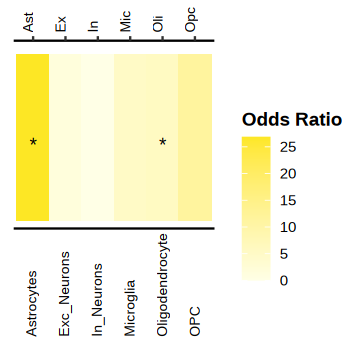

In [10]:
options(repr.plot.width=3, repr.plot.height=3)
ggplot(Mathys_overlap_test_up_table, aes(`celltype_Mathys`, 1, fill= `Odds Ratio`, label = ifelse(`p.adjust_FDR` < 0.05, "*", ""))) + 
  geom_tile() + theme_classic() + geom_text(vjust = 1, hjust = 0.5) +
  #scale_fill_gradient(low = "#ffccbc", high = "#ff6e40") +
scale_fill_gradient(low= '#FFFFE6', high='#FDE725')+
  xlab("Cell Types discovery dataset") + theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust=0, color="black", 
                                                                          size=8), axis.title.x=element_blank(),
                                               axis.text.y=element_blank(),axis.title.y=element_blank(), 
                                               axis.ticks.y=element_blank(), axis.line.y=element_blank(), 
                                               legend.title = element_text(face='bold')) + scale_x_discrete(position = "top") +
annotate(geom = "text", x = 1.1 + 1.01 * (0:5) , y = -0.2, angle=90, label =Mathys_overlap_test_up_table$`celltype_Fröhlich`, size = 2.9,
         vjust=0, hjust=0) + geom_hline(yintercept=0.45) 

#ggsave('../figures/Mathys_Age_FDR0.1_AD_overlap_up_heatmap.pdf', plot = last_plot(), width = 2.3, height =3)

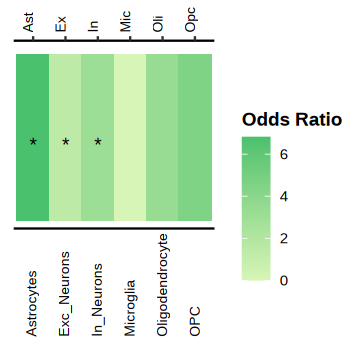

In [11]:
options(repr.plot.width=3, repr.plot.height=3)
ggplot(Mathys_overlap_test_down_table, aes(celltype_Mathys, 1, fill= `Odds Ratio`, label = ifelse(`p.adjust_FDR` < 0.05, "*", ""))) + 
  geom_tile() + theme_classic() + geom_text(vjust = 1, hjust = 0.5) +
  #scale_fill_viridis(option='cividis') +
#scale_fill_gradient2(low = '#2B3A67', mid = "#FFC482", high = "#e26d5c") +
  #scale_fill_gradient(low = "#99bcdc", high = "#1e3d59") +
scale_fill_gradient(low = '#D7F5B7', high= '#4AC16D')+
  xlab("Cell Types discovery dataset") + theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust=0, color="black", 
                                                                          size=8), axis.title.x=element_blank(),
                                               axis.text.y=element_blank(),axis.title.y=element_blank(), 
                                               axis.ticks.y=element_blank(), axis.line.y=element_blank(), 
                                               legend.title = element_text(face='bold')) + scale_x_discrete(position = "top") +
annotate(geom = "text", x = 1.1 + 1.01 * (0:5) , y = -0.2, angle=90, label = Mathys_overlap_test_down_table$`celltype_Fröhlich`, size = 2.9,
         vjust=0, hjust=0) + geom_hline(yintercept=0.45) 

#ggsave('../figures/Mathys_Age_FDR0.1_AD_overlap_down_heatmap.pdf', plot = last_plot(), width = 2.3, height =3)

### correlation of effect sizes

In [12]:
# Mathys et al. 
# IndModel.FC refers to log2 fold change of pathology mean value (AD) relative to no-pathology mean value (controls)

Mathys_spearman <- as.data.frame(matrix(ncol=5, nrow=length(cts_Mathys)))
colnames(Mathys_spearman) <- c('celltype_Fröhlich', 'celltype_Mathys', 'n_genes',
                                              'Rho', 'p-val')

merged <- list()
idx <- 0
for (ct in cts_Mathys){
    idx <- idx +1
    celltype <- names(cts_Mathys)[idx]
    tmp <- sig_DE_genes_Alzheimer[[ct]]
    colnames(tmp)[which(names(tmp) == 'gene_name')] <- 'ID'
    tmp2 <- merge(tmp, DE_genes_Age_sig_MJ[[celltype]], by='ID')
    if (dim(tmp2)[1] >1){
        merged[[celltype]] <- cor.test(as.numeric(tmp2$IndModel.FC), tmp2$logFC, method=c("spearman"))
        Mathys_spearman$celltype_Fröhlich[idx] <- celltype
        Mathys_spearman$celltype_Mathys[idx] <- ct 
        Mathys_spearman$n_genes[idx] <- length(tmp2$ID)
        Mathys_spearman$Rho[idx] <- merged[[celltype]]$estimate
        Mathys_spearman$`p-val`[idx] <- merged[[celltype]]$p.value
    }

} 

#adjust for multiple testing
Mathys_spearman$adj.P.Val <- p.adjust(Mathys_spearman$`p-val`, method='fdr', n=length(Mathys_spearman$`p-val`))

Mathys_spearman

#save
write_xlsx(Mathys_spearman, '../results/dreamlet_tables/major_celltypes/Mathys_Age_spearman_corr.xlsx')

celltype_Fröhlich,celltype_Mathys,n_genes,Rho,p-val,adj.P.Val
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
Astrocytes,Ast,15,0.8178571,0.0002971013,0.0008913040
Exc_Neurons,Ex,83,0.4108979,0.0001305564,0.0007833382
In_Neurons,In,8,0.1904762,0.6645833333,0.7975000000
Microglia,Mic,3,1.0000000,0.3333333333,0.5000000000
Oligodendrocyte,Oli,16,0.7735294,0.0006830219,0.0013660438
OPC,Opc,5,0.1000000,0.9500000000,0.9500000000


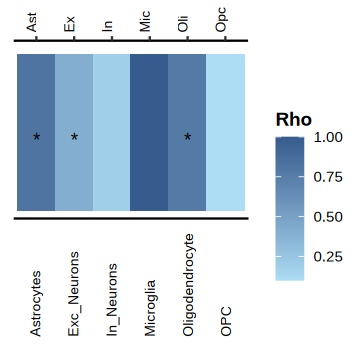

In [13]:
options(repr.plot.width=3, repr.plot.height=3)
ggplot(Mathys_spearman, aes(celltype_Mathys, 1, fill= Rho, label = ifelse(`adj.P.Val` < 0.05, "*", ""))) + 
  geom_tile() + theme_classic() + geom_text(vjust = 1, hjust = 0.5) +
  scale_fill_gradient(low = '#ACDDF4', high= '#365C8D') +
  xlab("Cell Types discovery dataset") + theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust=0, color="black", 
                                                                          size=8), axis.title.x=element_blank(),
                                               axis.text.y=element_blank(),axis.title.y=element_blank(), 
                                               axis.ticks.y=element_blank(), axis.line.y=element_blank(), 
                                               legend.title = element_text(face='bold')) + scale_x_discrete(position = "top") +
annotate(geom = "text", x = 1.1 + 1.01 * (0:5) , y = -0.31, angle=90, label =Mathys_spearman$`celltype_Fröhlich`, size = 2.9,
         vjust=0, hjust=0) + geom_hline(yintercept=0.45) 


#ggsave('../figures/Mathys_Age_FDR0.1_AD_Spearman_corr_heatmap.pdf', plot = last_plot(), width =2.045, height =3)

In [14]:
idx <- 0
for (celltype in cts_Mathys){
    idx <- idx+1
    ct <- names(cts_Mathys)[idx]
    n_overlap_total <- Mathys_overlap_test_up_table[ct,5] + Mathys_overlap_test_down_table[ct,5] 
    n_overlap_independent_of_directionality <- length(intersect(DE_genes_Age_sig_MJ[[ct]]$ID, sig_DE_genes_Alzheimer[[celltype]]$gene_name))
    y <- n_overlap_independent_of_directionality - n_overlap_total
    # are there any genes that overlap but have opposite logFC?
    print( paste0(ct, ': There is/are ', y, ' overlapping gene(s) with opposite logFC'))}

[1] "Astrocytes: There is/are 1 overlapping gene(s) with opposite logFC"
[1] "Exc_Neurons: There is/are 23 overlapping gene(s) with opposite logFC"
[1] "In_Neurons: There is/are 1 overlapping gene(s) with opposite logFC"
[1] "Microglia: There is/are 1 overlapping gene(s) with opposite logFC"
[1] "Oligodendrocyte: There is/are 2 overlapping gene(s) with opposite logFC"
[1] "OPC: There is/are 2 overlapping gene(s) with opposite logFC"


# Lau et al. 2020

## Read in Alzheimer associated genes

overlap of Age DE genes with genes identified with Alzheimer (Lau et al. 2020, PNAS 2020) <br>
Lau et al. https://doi.org/10.1073/pnas.2008762117  <br>
169,496 nuclei: 90,713 and 78,783 nuclei from 12 AD and 9 Ctrls, PFC(BA6, BA8, and BA9)

In [15]:
#cell types identified by Lau et al.
celltypes <- c('Astro', 'Endo', 'Excit', "Inhit", "Mic", "Oligo")

#READ IN excel file of diff expressed genes (each sheet contains one celltype)
#Alzheimer genes from paper: Lau et al 2020
DE_genes_AD_Lau<- list()
for (celltype in celltypes){
  DE_genes_AD_Lau[[celltype]] <- as.data.frame(read_excel("../external_datasets/Lau_et_al.pnas.2008762117.sd03.xlsx", sheet=celltype))
}
names(DE_genes_AD_Lau) <-  celltypes

# get significant DE genes
# cut off used in Lau et al. FDR 10% FC >= 0.1
DE_genes_AD_Lau_sig <- list()
for (celltype in celltypes){
    DE_genes_AD_Lau_sig[[celltype]] <- dplyr::filter(DE_genes_AD_Lau[[celltype]], abs(AD_vs_NC_log2fc) >= 0.1 & Adjusted_p_value <= 0.1)
}

#  split the DE genes in up- & downregulated

AD_Lau_up <- list()
for (celltype in celltypes){
  AD_Lau_up[[celltype]] <- dplyr::filter(DE_genes_AD_Lau_sig[[celltype]], AD_vs_NC_log2fc >0)
}

AD_Lau_down <- list()
for (celltype in celltypes){
  AD_Lau_down[[celltype]] <- dplyr::filter(DE_genes_AD_Lau_sig[[celltype]], AD_vs_NC_log2fc < 0)
}

In [16]:
# number of DE genes match the numbers reported
for (celltype in celltypes){
    up_tmp <- dim(AD_Lau_up[[celltype]])[1]
    down_tmp <- dim(AD_Lau_down[[celltype]])[1]
    print(paste0(celltype, ': upregulated genes: ', up_tmp, 
                 '; downregulated genes: ', down_tmp))
}

[1] "Astro: upregulated genes: 152; downregulated genes: 399"
[1] "Endo: upregulated genes: 267; downregulated genes: 32"
[1] "Excit: upregulated genes: 201; downregulated genes: 146"
[1] "Inhit: upregulated genes: 32; downregulated genes: 93"
[1] "Mic: upregulated genes: 111; downregulated genes: 229"
[1] "Oligo: upregulated genes: 151; downregulated genes: 377"


## Perform overlap

### upregulated genes

In [17]:
#cell type names matching
cts_Lau <- c('Astro', 'Endo', 'Excit', "Inhit", "Mic", "Oligo")
names(cts_Lau) <- c('Astrocytes','Endothelial', 'Exc_Neurons', 'In_Neurons', 'Microglia', "Oligodendrocyte")

##### upregulated genes:
Lau_overlap_test_up <- list()

idx <- 0
for (ct in cts_Lau){
    idx <- idx +1
    celltype <- names(cts_Lau)[idx]
    AD_Lau_up_filtered <- AD_Lau_up[[ct]][AD_Lau_up[[ct]]$Gene %in% DE_results_Age_MJ[[celltype]]$ID,] # remove genes not expressed in my dataset from the Lau genes 
    overlap <-  newGeneOverlap(AD_Lau_up_filtered$Gene, up[[celltype]]$ID,genome.size=length(DE_results_Age_MJ[[celltype]]$ID))
    Lau_overlap_test_up[[celltype]] <- testGeneOverlap(overlap)
}

Lau_overlap_test_up_table <- as.data.frame(matrix(ncol=8, nrow=length(cts_Lau)))
colnames(Lau_overlap_test_up_table) <- c('celltype_Fröhlich', 'celltype_Lau', 'AD DE genes Lau et al.', 'Age DE genes Fröhlich et al.', 'n overlap genes', 'Genome size', 'overlap p-value', 'Odds Ratio' )
rownames(Lau_overlap_test_up_table) <- names(cts_Lau)

idx <- 0
for (celltype in names(cts_Lau)){
    idx <- idx +1
    Lau_overlap_test_up_table[celltype,]$`celltype_Fröhlich` <- celltype
    Lau_overlap_test_up_table[celltype,]$celltype_Lau <- cts_Lau[idx]
    Lau_overlap_test_up_table[celltype,]$`AD DE genes Lau et al.` <- length(Lau_overlap_test_up[[celltype]]@listA)
    Lau_overlap_test_up_table[celltype,]$`Age DE genes Fröhlich et al.` <- length(Lau_overlap_test_up[[celltype]]@listB)
    Lau_overlap_test_up_table[celltype,]$`n overlap genes` <- length(Lau_overlap_test_up[[celltype]]@intersection)
    Lau_overlap_test_up_table[celltype,]$`Genome size` <- Lau_overlap_test_up[[celltype]]@genome.size
    Lau_overlap_test_up_table[celltype,]$`overlap p-value` <- Lau_overlap_test_up[[celltype]]@pval
    Lau_overlap_test_up_table[celltype,]$`Odds Ratio` <- Lau_overlap_test_up[[celltype]]@odds.ratio
}

# calculate the fdr adjusted p-value
Lau_overlap_test_up_table$p.adjust_FDR <- p.adjust(Lau_overlap_test_up_table$`overlap p-value`, 
                                                      method = 'fdr', n = length(Lau_overlap_test_up_table$`overlap p-value`))

Lau_overlap_test_up_table

# save
write_xlsx(Lau_overlap_test_up_table, '../results/dreamlet_tables/major_celltypes/Lau_Age_overlap_stats_up.xlsx')

,celltype_Fröhlich,celltype_Lau,AD DE genes Lau et al.,Age DE genes Fröhlich et al.,n overlap genes,Genome size,overlap p-value,Odds Ratio,p.adjust_FDR
,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Astrocytes,Astrocytes,Astro,143,159,19,11401,8.969743e-14,12.1627894,2.690923e-13
Endothelial,Endothelial,Endo,137,23,0,2714,1.000000e+00,0.0000000,1.000000e+00
Exc_Neurons,Exc_Neurons,Excit,190,961,6,19733,9.055814e-01,0.6346939,1.000000e+00
In_Neurons,In_Neurons,Inhit,26,388,1,16239,4.670101e-01,1.6356848,7.005151e-01
Microglia,Microglia,Mic,93,118,16,5233,1.427726e-10,10.2476747,2.855452e-10
Oligodendrocyte,Oligodendrocyte,Oligo,139,195,23,8881,2.353063e-14,9.8711248,1.411838e-13


In [18]:
Lau_Age_intersection_genes_up <- list()

idx <- 0
for (ct in cts_Lau){
    idx <- idx +1
    celltype <- names(cts_Lau)[idx]
    Lau_Age_intersection_genes_up[[celltype]] <- as.data.frame(intersect(AD_Lau_up[[ct]]$Gene, up[[celltype]]$ID))
    colnames(Lau_Age_intersection_genes_up[[celltype]]) <- 'intersection_genes_Age_AD_up'
}
head(Lau_Age_intersection_genes_up[['Astrocytes']])

# save
#write_xlsx(Lau_Age_intersection_genes_up, '../results/dreamlet_tables/major_celltypes/Lau_Age_intersection_genes_up.xlsx')

,intersection_genes_Age_AD_up
,<chr>
1,MT1F
2,COL21A1
3,MRAS
4,NEAT1
5,PNPLA6
6,IL17RB


### downregulated genes

In [19]:
##### downregulated genes:
Lau_overlap_test_down <- list()

idx <- 0
for (ct in cts_Lau){
    idx <- idx +1
    celltype <- names(cts_Lau)[idx]
    AD_Lau_down_filtered <- AD_Lau_down[[ct]][AD_Lau_down[[ct]]$Gene %in% DE_results_Age_MJ[[celltype]]$ID,] # remove genes not expressed in my dataset from the Lau genes 
    overlap <-  newGeneOverlap(AD_Lau_down_filtered$Gene, down[[celltype]]$ID,genome.size=length(DE_results_Age_MJ[[celltype]]$ID))
    Lau_overlap_test_down[[celltype]] <- testGeneOverlap(overlap)
}

Lau_overlap_test_down_table <- as.data.frame(matrix(ncol=8, nrow=length(cts_Lau)))
colnames(Lau_overlap_test_down_table) <- c('celltype_Fröhlich', 'celltype_Lau', 'AD DE genes Lau et al.', 'Age DE genes Fröhlich et al.', 'n overlap genes', 'Genome size', 'overlap p-value', 'Odds Ratio' )
rownames(Lau_overlap_test_down_table) <- names(cts_Lau)

idx <- 0
for (celltype in names(cts_Lau)){
    idx <- idx +1
    Lau_overlap_test_down_table[celltype,]$`celltype_Fröhlich` <- celltype
    Lau_overlap_test_down_table[celltype,]$`celltype_Lau` <- cts_Lau[idx]
    Lau_overlap_test_down_table[celltype,]$`AD DE genes Lau et al.` <- length(Lau_overlap_test_down[[celltype]]@listA)
    Lau_overlap_test_down_table[celltype,]$`Age DE genes Fröhlich et al.` <- length(Lau_overlap_test_down[[celltype]]@listB)
    Lau_overlap_test_down_table[celltype,]$`n overlap genes` <- length(Lau_overlap_test_down[[celltype]]@intersection)
    Lau_overlap_test_down_table[celltype,]$`Genome size` <- Lau_overlap_test_down[[celltype]]@genome.size
    Lau_overlap_test_down_table[celltype,]$`overlap p-value` <- Lau_overlap_test_down[[celltype]]@pval
    Lau_overlap_test_down_table[celltype,]$`Odds Ratio` <- Lau_overlap_test_down[[celltype]]@odds.ratio
}

# calculate the fdr adjusted p-value
Lau_overlap_test_down_table$p.adjust_FDR <- p.adjust(Lau_overlap_test_down_table$`overlap p-value`, 
                                                      method = 'fdr', n = length(Lau_overlap_test_down_table$`overlap p-value`))

Lau_overlap_test_down_table

# save
write_xlsx(Lau_overlap_test_down_table, '../results/dreamlet_tables/major_celltypes/Lau_Age_overlap_stats_down.xlsx')

,celltype_Fröhlich,celltype_Lau,AD DE genes Lau et al.,Age DE genes Fröhlich et al.,n overlap genes,Genome size,overlap p-value,Odds Ratio,p.adjust_FDR
,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Astrocytes,Astrocytes,Astro,381,342,32,11401,1.325808e-07,3.167199,2.651615e-07
Endothelial,Endothelial,Endo,17,61,1,2714,3.213225e-01,2.745048,3.506548e-01
Exc_Neurons,Exc_Neurons,Excit,140,1295,35,19733,3.663414e-12,4.849253,1.099024e-11
In_Neurons,In_Neurons,Inhit,91,911,26,16239,2.577432e-12,6.896170,1.099024e-11
Microglia,Microglia,Mic,199,105,7,5233,1.037396e-01,1.836125,1.556094e-01
Oligodendrocyte,Oligodendrocyte,Oligo,359,165,8,8881,3.506548e-01,1.214334,3.506548e-01


In [20]:
Lau_Age_intersection_genes_down <- list()

idx <- 0
for (ct in cts_Lau){
    idx <- idx +1
    celltype <- names(cts_Lau)[idx]
    Lau_Age_intersection_genes_down[[celltype]] <- as.data.frame(intersect(AD_Lau_down[[ct]]$Gene, down[[celltype]]$ID))
    colnames(Lau_Age_intersection_genes_down[[celltype]]) <- 'intersection_genes_Age_AD_down'
}
head(Lau_Age_intersection_genes_down[['Astrocytes']])

# save
#write_xlsx(Lau_Age_intersection_genes_down, '../results/dreamlet_tables/major_celltypes/Lau_Age_intersection_genes_down.xlsx')

,intersection_genes_Age_AD_down
,<chr>
1,CHN1
2,FAM162A
3,LRRC4C
4,MMD2
5,EFR3B
6,BICC1


### heatmap overlap results

## Fig.6b

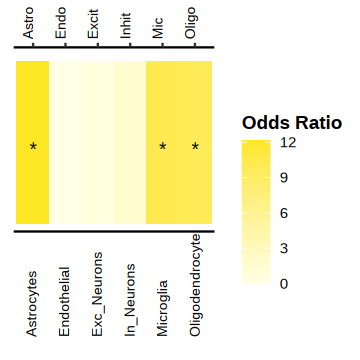

In [21]:
options(repr.plot.width=3, repr.plot.height=3)
ggplot(Lau_overlap_test_up_table, aes(celltype_Lau, 1, fill= `Odds Ratio`, label = ifelse(`p.adjust_FDR` < 0.05, "*", ""))) + 
  geom_tile() + theme_classic() + geom_text(vjust = 1, hjust = 0.5) +
  scale_fill_gradient(low= '#FFFFE6', high='#FDE725')+
  xlab("Cell Types discovery dataset") + theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust=0, color="black", 
                                                                          size=8), axis.title.x=element_blank(),
                                               axis.text.y=element_blank(),axis.title.y=element_blank(), 
                                               axis.ticks.y=element_blank(), axis.line.y=element_blank(), 
                                               legend.title = element_text(face='bold')) + scale_x_discrete(position = "top") +
annotate(geom = "text", x = 1.1 + 1.01 * (0:5) , y = -0.2, angle=90, label = Lau_overlap_test_up_table$`celltype_Fröhlich`, size = 2.9,
         vjust=0, hjust=0) + geom_hline(yintercept=0.45) 

#ggsave('../figures/Lau_Age_FDR0.1_AD_overlap_up_heatmap.pdf', plot = last_plot(), width = 2.3, height =3)

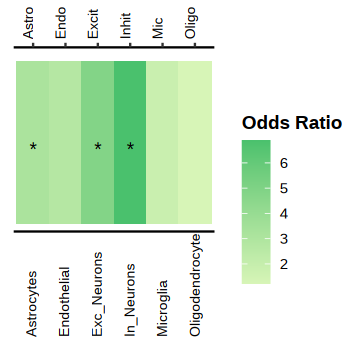

In [22]:
options(repr.plot.width=3, repr.plot.height=3)
ggplot(Lau_overlap_test_down_table, aes(celltype_Lau, 1, fill= `Odds Ratio`, label = ifelse(`p.adjust_FDR` < 0.05, "*", ""))) + 
  geom_tile() + theme_classic() + geom_text(vjust = 1, hjust = 0.5) +
  #scale_fill_viridis(option='cividis') +
#scale_fill_gradient2(low = '#2B3A67', mid = "#FFC482", high = "#e26d5c") +
  scale_fill_gradient(low = '#D7F5B7', high= '#4AC16D') +
  xlab("Cell Types discovery dataset") + theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust=0, color="black", 
                                                                          size=8), axis.title.x=element_blank(),
                                               axis.text.y=element_blank(),axis.title.y=element_blank(), 
                                               axis.ticks.y=element_blank(), axis.line.y=element_blank(), 
                                               legend.title = element_text(face='bold')) + scale_x_discrete(position = "top") +
annotate(geom = "text", x = 1.1 + 1.01 * (0:5) , y = -0.2, angle=90, label = Lau_overlap_test_down_table$`celltype_Fröhlich`, size = 2.9,
         vjust=0, hjust=0) + geom_hline(yintercept=0.45) 

#ggsave('../figures/Lau_Age_FDR0.1_AD_overlap_down_heatmap.pdf', plot = last_plot(), width = 2.3, height =3)

### correlation of effect sizes

In [23]:
#Lau et al. 
#AD_vs_NC_log2fc refers to log2FC between controls and AD

Lau_spearman <- as.data.frame(matrix(ncol=5, nrow=length(cts_Lau)))
colnames(Lau_spearman) <- c('celltype_Fröhlich', 'celltype_Lau', 'n_genes',
                                              'Rho', 'p-val')

merged <- list()
idx <- 0
for (ct in cts_Lau){
    idx <- idx +1
    celltype <- names(cts_Lau)[idx]
    tmp <- DE_genes_AD_Lau_sig[[ct]]
    colnames(tmp)[which(names(tmp) == 'Gene')] <- 'ID'
    tmp2 <- merge(tmp, DE_genes_Age_sig_MJ[[celltype]], by='ID')
    if (dim(tmp2)[1] >1){
        merged[[celltype]] <- cor.test(as.numeric(tmp2$AD_vs_NC_log2fc), tmp2$logFC, method=c("spearman"))
        Lau_spearman$celltype_Fröhlich[idx] <- celltype
        Lau_spearman$celltype_Lau[idx] <- ct 
        Lau_spearman$n_genes[idx] <- length(tmp2$ID)
        Lau_spearman$Rho[idx] <- merged[[celltype]]$estimate
        Lau_spearman$`p-val`[idx] <- merged[[celltype]]$p.value
    }

} 

#adjust for multiple testing
Lau_spearman$adj.P.Val <- p.adjust(Lau_spearman$`p-val`, method='fdr', n=length(Lau_spearman$`p-val`))

Lau_spearman

# save
write_xlsx(Lau_spearman, '../results/dreamlet_tables/major_celltypes/Lau_Age_spearman_corr.xlsx')

celltype_Fröhlich,celltype_Lau,n_genes,Rho,p-val,adj.P.Val
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
Astrocytes,Astro,60,0.4994165,6.117957e-05,0.0003670774
Endothelial,Endo,8,-0.5000000,2.161706e-01,0.2161706349
Exc_Neurons,Excit,67,0.3625190,2.722233e-03,0.0054444667
In_Neurons,Inhit,29,0.3699507,4.900292e-02,0.0588035072
Microglia,Mic,31,0.5435484,1.849908e-03,0.0054444667
Oligodendrocyte,Oligo,41,0.3329268,3.395540e-02,0.0509331020


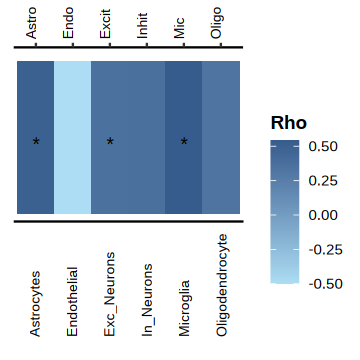

In [24]:
options(repr.plot.width=3, repr.plot.height=3)
ggplot(Lau_spearman, aes(celltype_Lau, 1, fill= Rho, label = ifelse(`adj.P.Val` < 0.05, "*", ""))) + 
  geom_tile() + theme_classic() + geom_text(vjust = 1, hjust = 0.5) +
  scale_fill_gradient(low = '#ACDDF4', high= '#365C8D') +
  xlab("Cell Types discovery dataset") + theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust=0, color="black", 
                                                                          size=8), axis.title.x=element_blank(),
                                               axis.text.y=element_blank(),axis.title.y=element_blank(), 
                                               axis.ticks.y=element_blank(), axis.line.y=element_blank(), 
                                               legend.title = element_text(face='bold')) + scale_x_discrete(position = "top") +
annotate(geom = "text", x = 1.1 + 1.01 * (0:5) , y = -0.31, angle=90, label =Lau_spearman$`celltype_Fröhlich`, size = 2.9,
         vjust=0, hjust=0) + geom_hline(yintercept=0.45) 


#ggsave('../figures/Lau_Age_FDR0.1_AD_Spearman_corr_heatmap.pdf', plot = last_plot(), width =2.12, height =3)

In [25]:
idx <- 0
for (celltype in cts_Lau){
    idx <- idx+1
    ct <- names(cts_Lau)[idx]
    n_overlap_total <- Lau_overlap_test_up_table[ct,5] + Lau_overlap_test_down_table[ct,5] 
    n_overlap_independent_of_directionality <- length(intersect(DE_genes_Age_sig_MJ[[ct]]$ID, DE_genes_AD_Lau_sig[[celltype]]$Gene))
    y <- n_overlap_independent_of_directionality - n_overlap_total
    # are there any genes that overlap but have opposite logFC?
    print( paste0(ct, ': There is/are ', y, ' overlapping gene(s) with opposite logFC'))}

[1] "Astrocytes: There is/are 9 overlapping gene(s) with opposite logFC"
[1] "Endothelial: There is/are 7 overlapping gene(s) with opposite logFC"
[1] "Exc_Neurons: There is/are 26 overlapping gene(s) with opposite logFC"
[1] "In_Neurons: There is/are 2 overlapping gene(s) with opposite logFC"
[1] "Microglia: There is/are 8 overlapping gene(s) with opposite logFC"
[1] "Oligodendrocyte: There is/are 10 overlapping gene(s) with opposite logFC"


# overlap of DE Age genes with AD genes of both datasets

In [26]:
# common upregulated
intersect(intersect(up[['Exc_Neurons']]$ID, sig_DE_genes_Alzheimer_up[['Ex']]$gene_name),intersect(up[['Exc_Neurons']]$ID, AD_Lau_up[['Excit']]$Gene))
intersect(intersect(up[['In_Neurons']]$ID, sig_DE_genes_Alzheimer_up[['In']]$gene_name),intersect(up[['In_Neurons']]$ID, AD_Lau_up[['Inhit']]$Gene))
intersect(intersect(up[['Astrocytes']]$ID, sig_DE_genes_Alzheimer_up[['Ast']]$gene_name),intersect(up[['Astrocytes']]$ID, AD_Lau_up[['Astro']]$Gene))
intersect(intersect(up[['Microglia']]$ID, sig_DE_genes_Alzheimer_up[['Mic']]$gene_name),intersect(up[['Microglia']]$ID, AD_Lau_up[['Mic']]$Gene))
intersect(intersect(up[['Oligodendrocyte']]$ID, sig_DE_genes_Alzheimer_up[['Oli']]$gene_name),intersect(up[['Oligodendrocyte']]$ID, AD_Lau_up[['Oligo']]$Gene))

[1] "HRH3"    "ADAMTS2" "ELK1"    "SNPH"

character(0)

[1] "PLEKHA5" "SYNM"    "PLEC"    "AHNAK"   "MRAS"    "VCAN"

[1] "MYO1E"

[1] "SLC6A15" "MID1IP1" "SUN2"

In [27]:
# common downregulated
intersect(intersect(down[['Exc_Neurons']]$ID, sig_DE_genes_Alzheimer_down[['Ex']]$gene_name),intersect(down[['Exc_Neurons']]$ID, AD_Lau_down[['Excit']]$Gene))
intersect(intersect(down[['In_Neurons']]$ID, sig_DE_genes_Alzheimer_down[['In']]$gene_name),intersect(down[['In_Neurons']]$ID, AD_Lau_down[['Inhit']]$Gene))
intersect(intersect(down[['Astrocytes']]$ID, sig_DE_genes_Alzheimer_down[['Ast']]$gene_name),intersect(down[['Astrocytes']]$ID, AD_Lau_down[['Astro']]$Gene))
intersect(intersect(down[['Microglia']]$ID, sig_DE_genes_Alzheimer_down[['Mic']]$gene_name),intersect(down[['Microglia']]$ID, AD_Lau_down[['Mic']]$Gene))
intersect(intersect(down[['Oligodendrocyte']]$ID, sig_DE_genes_Alzheimer_down[['Oli']]$gene_name),intersect(down[['Oligodendrocyte']]$ID, AD_Lau_down[['Oligo']]$Gene))

[1] "RTN4"  "RPH3A" "RGS4"  "SNCG"

[1] "TMSB4X" "BEX2"

[1] "GRM3"  "PREX2" "DIO2"  "GRIA2"

character(0)

[1] "NRGN"  "GPM6A"

In [28]:
# for each cell type get genes with opposite regulation

Age_down_AD_Lau_up <- list()
Age_up_AD_Lau_down <- list()
idx <- 0
for (celltype in cts_Lau){
    idx <- idx+1
    ct <- names(cts_Lau)[idx]
    Age_down_AD_Lau_up[[ct]] <- intersect(AD_Lau_up[[celltype]]$Gene, down[[ct]]$ID)
    Age_up_AD_Lau_down[[ct]] <- intersect(AD_Lau_down[[celltype]]$Gene, up[[ct]]$ID)
}
#Age_down_AD_Lau_up
#Age_up_AD_Lau_down

Age_down_AD_Mathys_up <- list()
Age_up_AD_Mathys_down <- list()

idx <- 0
for (celltype in cts_Mathys){
    idx <- idx+1
    ct <- names(cts_Mathys)[idx]
    Age_down_AD_Mathys_up[[ct]] <- intersect(sig_DE_genes_Alzheimer_up[[celltype]]$gene_name, down[[ct]]$ID)
    Age_up_AD_Mathys_down[[ct]] <- intersect(sig_DE_genes_Alzheimer_down[[celltype]]$gene_name, up[[ct]]$ID)
}
#Age_down_AD_Mathys_up
#Age_up_AD_Mathys_down

common_Age_down_AD_up <- list()
common_Age_up_AD_down <- list()
for (celltype in names(Age_down_AD_Mathys_up)){
    common_Age_down_AD_up[[celltype]] <- intersect(Age_down_AD_Mathys_up[[celltype]],Age_down_AD_Lau_up[[celltype]] )
    common_Age_up_AD_down[[celltype]] <- intersect(Age_up_AD_Mathys_down[[celltype]],Age_up_AD_Lau_down[[celltype]] ) 
}

for (celltype in names(common_Age_down_AD_up)){
    print(paste0('Age down AD up ',celltype,": ", common_Age_down_AD_up[[celltype]]))
    print(paste0('Age up AD down ', celltype,": ", common_Age_up_AD_down[[celltype]]))
}

[1] "Age down AD up Astrocytes: "
[1] "Age up AD down Astrocytes: "
[1] "Age down AD up Exc_Neurons: LINGO1" "Age down AD up Exc_Neurons: KCTD17"
[1] "Age up AD down Exc_Neurons: "
[1] "Age down AD up In_Neurons: "
[1] "Age up AD down In_Neurons: "
[1] "Age down AD up Microglia: "
[1] "Age up AD down Microglia: "
[1] "Age down AD up Oligodendrocyte: LINGO1"
[1] "Age up AD down Oligodendrocyte: "


## Fig. 6d

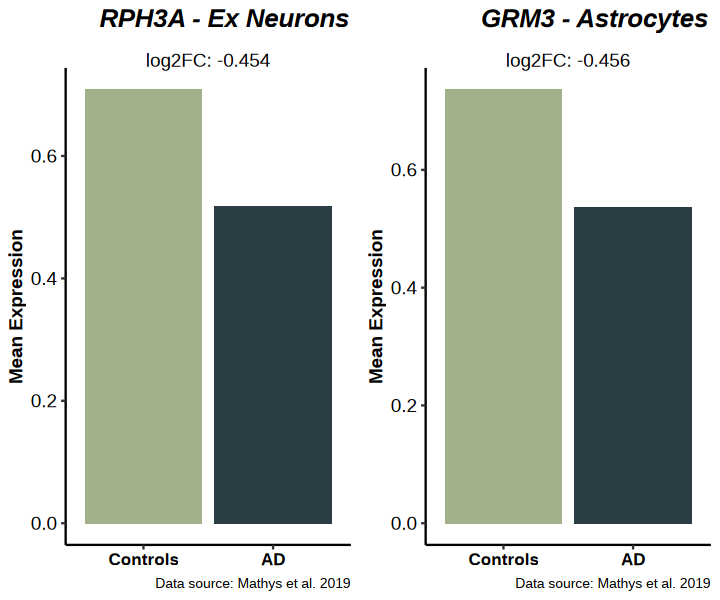

In [9]:
# RPH3A - Ex Neurons
tmp <- sig_DE_genes_Alzheimer[['Ex']][sig_DE_genes_Alzheimer[['Ex']]$gene_name == 'RPH3A',]
RPH3A_Ex <- as.data.frame(matrix(ncol=3,nrow=2))
colnames(RPH3A_Ex) <- c('Group', 'mean_expr', 'log2FC')
RPH3A_Ex$Group <- c("Controls", 'AD')
RPH3A_Ex$Group <- factor(RPH3A_Ex$Group, levels=c("Controls", 'AD'))
RPH3A_Ex$mean_expr[1] <- as.numeric(tmp$no.pathology.mean)
RPH3A_Ex$mean_expr[2] <- as.numeric(tmp$pathology.mean)
RPH3A_Ex$log2FC <- as.numeric(tmp$IndModel.FC)
RPH3A_Ex$IndModel.adj.pvals <- as.numeric(tmp$IndModel.adj.pvals)
RPH3A_Ex$MixedModel.p <- as.numeric(tmp$MixedModel.p)

figlist <- list()
figlist[['RPH3A_Ex']] <- ggplot(RPH3A_Ex,aes(x=Group, y=mean_expr)) +
  geom_bar(stat="identity", fill=c('#A3B18A', '#2A3D45')) +theme_classic() +
  labs(title = "RPH3A - Ex Neurons",
       subtitle = paste0('log2FC: ', round(RPH3A_Ex$log2FC[1], digits=3)),
       caption = "Data source: Mathys et al. 2019") + theme(plot.subtitle = element_text(hjust = 0.5, vjust=-2, size = 11), 
                                                            plot.title = element_text(face='bold.italic', size = 15, hjust = 0.95), 
                                                            axis.text.x = element_text(color="black", size=10, face='bold'),
                                                            axis.text.y = element_text(color="black", size=11),axis.title.x=element_blank(),
                                                            axis.title.y=element_text(face='bold', size=11), plot.caption = element_text(size=8)) + 
ylab('Mean Expression')


# GRM3 - Astrocytes
tmp <- sig_DE_genes_Alzheimer[['Ast']][sig_DE_genes_Alzheimer[['Ast']]$gene_name == 'GRM3',]
GRM3_Ast <- as.data.frame(matrix(ncol=3,nrow=2))
colnames(GRM3_Ast) <- c('Group', 'mean_expr', 'log2FC')
GRM3_Ast$Group <- c("Controls", 'AD')
GRM3_Ast$Group <- factor(GRM3_Ast$Group, levels=c("Controls", 'AD'))
GRM3_Ast$mean_expr[1] <- as.numeric(tmp$no.pathology.mean)
GRM3_Ast$mean_expr[2] <- as.numeric(tmp$pathology.mean)
GRM3_Ast$log2FC <- as.numeric(tmp$IndModel.FC)
GRM3_Ast$IndModel.adj.pvals <- as.numeric(tmp$IndModel.adj.pvals)
GRM3_Ast$MixedModel.p <- as.numeric(tmp$MixedModel.p)

figlist[['GRM3_Ast']] <- ggplot(GRM3_Ast,aes(x=Group, y=mean_expr)) +
  geom_bar(stat="identity", fill=c('#A3B18A', '#2A3D45')) +theme_classic() +
  labs(title = "GRM3 - Astrocytes",
       subtitle = paste0('log2FC: ', round(GRM3_Ast$log2FC[1], digits=3)),
       caption = "Data source: Mathys et al. 2019") + theme(plot.subtitle = element_text(hjust = 0.5, vjust=-2, size = 11), 
                                                            plot.title = element_text(face='bold.italic', size = 15, hjust = 0.95), 
                                                            axis.text.x = element_text(color="black", size=10, face='bold'),
                                                            axis.text.y = element_text(color="black", size=11),axis.title.x=element_blank(),
                                                            axis.title.y=element_text(face='bold', size=11), plot.caption = element_text(size=8)) + 
ylab('Mean Expression')

options(repr.plot.width=6, repr.plot.height=5)
plot_grid(plotlist = figlist, nrow=1)


ggsave('../figures/Mathys_AD_barplot_RPH3A_GRM3.pdf', plot = last_plot(), width = 4.5, height =3.5)

## Fig. 6f

In [ ]:
# plots opposite FC Age AD

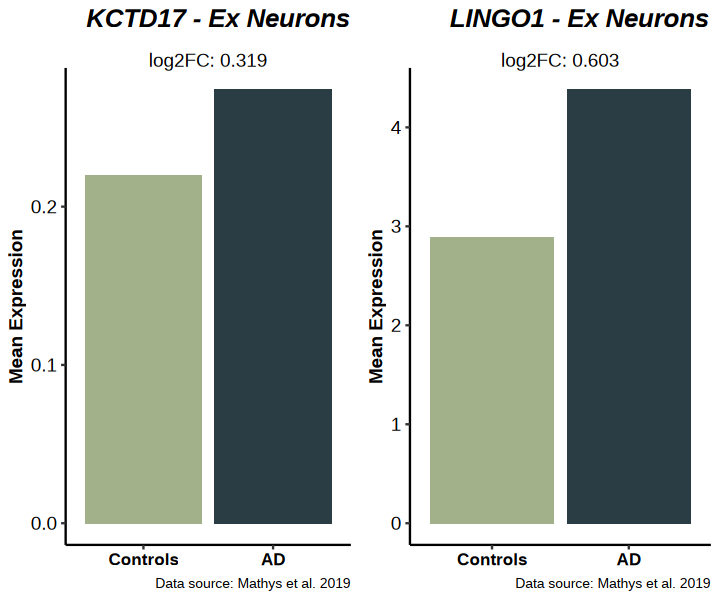

In [10]:
# KCTD17 - Ex Neurons
tmp <- sig_DE_genes_Alzheimer[['Ex']][sig_DE_genes_Alzheimer[['Ex']]$gene_name == 'KCTD17',]
KCTD17_Ex <- as.data.frame(matrix(ncol=3,nrow=2))
colnames(KCTD17_Ex) <- c('Group', 'mean_expr', 'log2FC')
KCTD17_Ex$Group <- c("Controls", 'AD')
KCTD17_Ex$Group <- factor(KCTD17_Ex$Group, levels=c("Controls", 'AD'))
KCTD17_Ex$mean_expr[1] <- as.numeric(tmp$no.pathology.mean)
KCTD17_Ex$mean_expr[2] <- as.numeric(tmp$pathology.mean)
KCTD17_Ex$log2FC <- as.numeric(tmp$IndModel.FC)
KCTD17_Ex$IndModel.adj.pvals <- as.numeric(tmp$IndModel.adj.pvals)
KCTD17_Ex$MixedModel.p <- as.numeric(tmp$MixedModel.p)

figlist <- list()
figlist[['KCTD17_Ex']] <- ggplot(KCTD17_Ex,aes(x=Group, y=mean_expr)) +
  geom_bar(stat="identity", fill=c('#A3B18A', '#2A3D45')) +theme_classic() +
  labs(title = "KCTD17 - Ex Neurons",
       subtitle = paste0('log2FC: ', round(KCTD17_Ex$log2FC[1], digits=3)),
       caption = "Data source: Mathys et al. 2019") + theme(plot.subtitle = element_text(hjust = 0.5, vjust=-2, size = 11), 
                                                            plot.title = element_text(face='bold.italic', size = 15, hjust = 0.95), 
                                                            axis.text.x = element_text(color="black", size=10, face='bold'),
                                                            axis.text.y = element_text(color="black", size=11),axis.title.x=element_blank(),
                                                            axis.title.y=element_text(face='bold', size=11), plot.caption = element_text(size=8)) + 
ylab('Mean Expression')

# LINGO1 - Ex Neurons
tmp <- sig_DE_genes_Alzheimer[['Ex']][sig_DE_genes_Alzheimer[['Ex']]$gene_name == 'LINGO1',]
LINGO1_Ex <- as.data.frame(matrix(ncol=3,nrow=2))
colnames(LINGO1_Ex) <- c('Group', 'mean_expr', 'log2FC')
LINGO1_Ex$Group <- c("Controls", 'AD')
LINGO1_Ex$Group <- factor(LINGO1_Ex$Group, levels=c("Controls", 'AD'))
LINGO1_Ex$mean_expr[1] <- as.numeric(tmp$no.pathology.mean)
LINGO1_Ex$mean_expr[2] <- as.numeric(tmp$pathology.mean)
LINGO1_Ex$log2FC <- as.numeric(tmp$IndModel.FC)
LINGO1_Ex$IndModel.adj.pvals <- as.numeric(tmp$IndModel.adj.pvals)
LINGO1_Ex$MixedModel.p <- as.numeric(tmp$MixedModel.p)

figlist[['LINGO1_Ex']] <- ggplot(LINGO1_Ex,aes(x=Group, y=mean_expr)) +
  geom_bar(stat="identity", fill=c('#A3B18A', '#2A3D45')) +theme_classic() +
  labs(title = "LINGO1 - Ex Neurons",
       subtitle = paste0('log2FC: ', round(LINGO1_Ex$log2FC[1], digits=3)),
       caption = "Data source: Mathys et al. 2019") + theme(plot.subtitle = element_text(hjust = 0.5, vjust=-2, size = 11), 
                                                            plot.title = element_text(face='bold.italic', size = 15, hjust = 0.95), 
                                                            axis.text.x = element_text(color="black", size=10, face='bold'),
                                                            axis.text.y = element_text(color="black", size=11),axis.title.x=element_blank(),
                                                            axis.title.y=element_text(face='bold', size=11), plot.caption = element_text(size=8)) + 
ylab('Mean Expression')

plot_grid(plotlist = figlist, nrow=1)

ggsave('../figures/Mathys_AD_barplot_KCTD17_LINGO1.pdf', plot = last_plot(), width = 4.5, height =3.5)

# SessionInfo

In [26]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /psycl/u/afroe/conda-envs/dreamlet_duplicated/lib/libopenblasp-r0.3.24.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Berlin
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] cowplot_1.1.1      GeneOverlap_1.38.0 readxl_1.4.3       lubridate_1.9.3   
 [5] forcats_1.0.0      stringr_1.5.1      dplyr_1.1.4        purrr_1.0.2       
 [9] readr_2.1.4        tidyr_1.3.0        tibble